In [70]:
#FEITO POR:
#Felipe Orlando Lanzara - 24.122.057-7
#João Vitor Governatore - 24.122.027-6
#Pedro Henrique Lega Kramer Costa - 24.122.049-0

# 1- escolher um arquivo csv - FEITO

# 2- definir o target(y) e um atributo(x) - FEITO

# 3- resolver todos os tópicos do projeto
#   a.1) calcular a média - FEITO
#   a.2) calcular a variância - FEITO
#   a.3) calcular o desvio padrão - FEITO
#   a.4) calcular a mediana para x e y - FEITO
#   b) fazer o histograma de x e y - FEITO POREM PRECISA PERGUNTAR AO PROF QUE TAMANGO DEIXAR OS GRAFICOS
#   c) fazer o boxplot de x e y - FEITO POREM PRECISA PERGUNTAR AO PROF QUE TAMANGO DEIXAR OS GRAFICOS
#   d) calcular o coeficiente de correlação de x e y - FEITO
#   e) fazer o teste de normalidade para x e y - FEITO EU ACHO
#   f) fazer o gráfico de densidade junto com o histograma para as variáveis x e y - FEITO EU ACHO

# 4- fazer uma apresentação com os códigos e com os resultados obtidos 

# -----------------------------------------COMEÇO DO PROJETO----------------------------------------- #

In [71]:
# 0- IMPORT DE TODAS AS BIBLIOTECAS

# bibliotecas usadas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [72]:
# 1- ESCOLHA DO ARQUIVO CSV

# puxando o arquivo do excel para o python
data = pd.read_csv('houses_to_rent_v2.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data = data.dropna()
data.head(25)

Número de linhas e colunas: (10692, 13)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [73]:
# 2- ESCOLHA DOS TARGETS

# target x - area
print('O atributo x será "area"')
# target y - rooms
print('O atributo y será "rooms"')

O atributo x será "area"
O atributo y será "rooms"


In [74]:
# 3- A.1) CALCULO DA MEDIA

# pegando as colunas e escolhendo os targets
col_area = 1 # 1 é a posicao da coluna de area
col_rooms = 2 # 2 é a posicao da coluna de rooms
data = data.to_numpy()
x = data[:,col_area]
y = data[:,col_rooms]

# calcular a media de x e y
media_x = np.mean(x)
media_y = np.mean(y)
print(f'A média da área (x) é: {media_x:.2f} m')
print(f'A média de quartos (y) é: {media_y:.2f} m²')


A média da área (x) é: 149.22 m
A média de quartos (y) é: 2.51 m²


In [75]:
# 3- A.2) CALCULO DA VARIÂNCIA

# calcular a variancia de x e y
variancia_x = np.var(x)
variancia_y = np.var(y)
print(f'A variância da área (x) é de {variancia_x:.2f}')
print(f'A variância dos quartos (y) é de {variancia_y:.2f}')

# descrever os status de x e y
xx = list(x) # convert the data from numpy.object to float
yy = list(y) # convert the data from numpy.object to float

stats_x = stats.describe(xx)
stats_y = stats.describe(yy)
print(f'\nA descrição dos stats da área (x) é: {stats_x}')
print(f'A descrição dos stats dos quartos (y) é: {stats_y}')

A variância da área (x) é de 288360.22
A variância dos quartos (y) é de 1.37

A descrição dos stats da área (x) é: DescribeResult(nobs=10692, minmax=(11, 46335), mean=149.21791994014217, variance=288387.19635642495, skewness=69.58703944644104, kurtosis=5545.713504814529)
A descrição dos stats dos quartos (y) é: DescribeResult(nobs=10692, minmax=(1, 13), mean=2.506079311634867, variance=1.3718646379893122, skewness=0.7022920325698145, kurtosis=1.4864019195329492)


In [76]:
# 3- A.3) CALCULO DO DESVIO PADRÃO

# calculando o desvio padrao de x e y
desvio_x = np.std(x, ddof = 1)
desvio_y = np.std(y, ddof = 1)
print(f'O desvio padrão da área (x) é de: {desvio_x:.2f}')
print(f'O desvio padrão dos quartos (y) é de: {desvio_y:.2f}')

O desvio padrão da área (x) é de: 537.02
O desvio padrão dos quartos (y) é de: 1.17


In [77]:
# 3- a.4) CALCULO DA MEDIANA

# calculando mediana de x e y
mediana_x = np.median(x)
mediana_y = np.median(y)
print(f'A mediana da área (x) é de: {mediana_x:.2f}')
print(f'A mediana dos quartos (y) é de: {mediana_y:.2f}')

A mediana da área (x) é de: 90.00
A mediana dos quartos (y) é de: 2.00


In [78]:
# 3- b) FAZER O HISTOGRAMA DE X E Y

# calculo do histograma de x e y
histograma_x = np.histogram(x, bins = 'auto')
histograma_y = np.histogram(y, bins = 'auto')
print(f'O histograma da área (x) é: {histograma_x}')
print(f'\nO histograma dos quartos (y) é: {histograma_y}')



O histograma da área (x) é: (array([195, 500, 969, ...,   0,   0,   1], dtype=int64), array([11.0, 22.438024691358024, 33.87604938271605, ...,
       46312.123950617286, 46323.56197530864, 46335.0], dtype=object))

O histograma dos quartos (y) é: (array([2454,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       2975,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       3269,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1586,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        288,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         68,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         36,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         11,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    

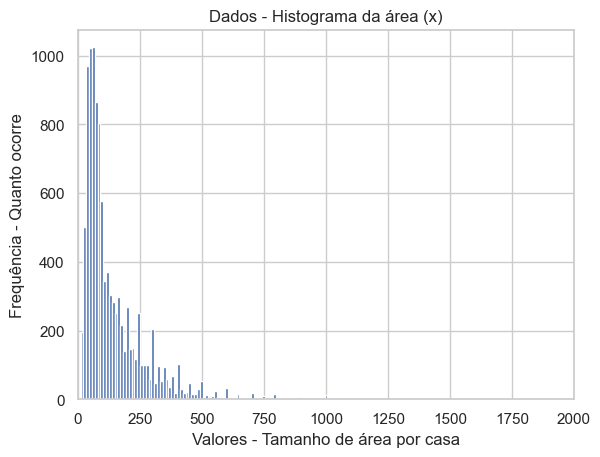

In [79]:
# fazer o histograma de x - grafic
plt.hist(x, bins = 'auto')
plt.title('Dados - Histograma da área (x)') 
plt.ylabel('Frequência - Quanto ocorre') # frequencia em que os valores (area por casa) ocorrem na tabela de dados
plt.xlabel('Valores - Tamanho de área por casa') # valores da tabela - tamanho da area de uma casa
plt.xlim(0, 2000) # minimo = 0, maximo = 2000
plt.show()


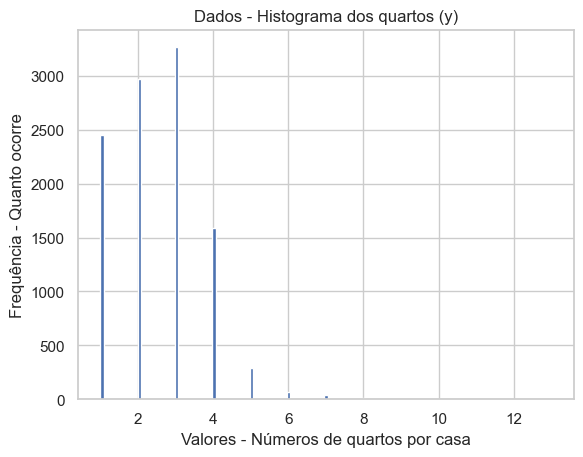

In [80]:
# fazer o histograma de y - grafico
plt.hist(y, bins = 'auto')
plt.title('Dados - Histograma dos quartos (y)')
plt.ylabel('Frequência - Quanto ocorre') # frequencia em que os valores (numero de quartos por casa) ocorrem na tabela de dados
plt.xlabel('Valores - Números de quartos por casa') # valores da tabela - quantidade de quartos de uma casa
plt.show()

(0.0, 1200.0)

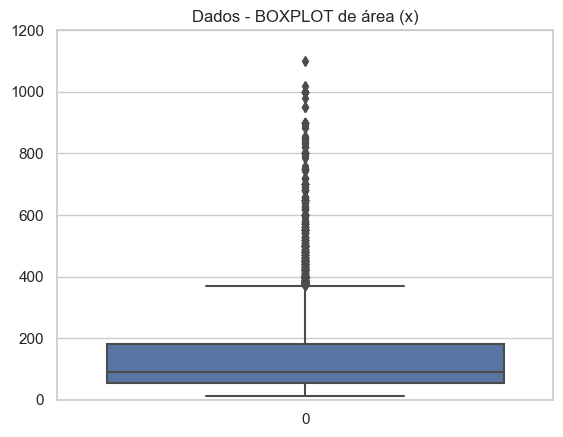

In [81]:
# 3- c) FAZER O BOXPLOT DE X - nao é possivel fazer os dois na mesma celula

# boxplot de x
sns.set(style="whitegrid")
plt.title('Dados - BOXPLOT de área (x)')
boxplot_x = sns.boxplot(x)
plt.ylim(0, 1200)

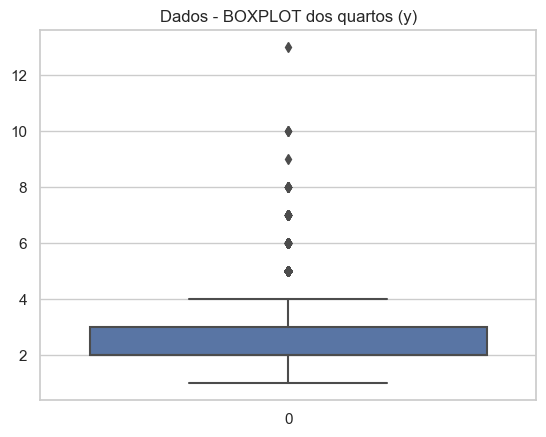

In [82]:
# 3- c) FAZER O BOXPLOT DE Y - nao é possivel fazer os dois na mesma celula

# boxplot de y
sns.set(style="whitegrid")
plt.title('Dados - BOXPLOT dos quartos (y)')
boxplot_y = sns.boxplot(y)

In [83]:
# 3- d) CALCULAR O COEFICIENTE DE CORRELAÇÃO DE X E Y

# coeficiente de correlação usando as lista de x e y
correlacao = np.corrcoef(xx, yy) # xx = lista de x, yy = lista de y
print(correlacao)

[[1.         0.19379627]
 [0.19379627 1.        ]]


In [84]:
# 3- e) FAZER O TESTE DE NORMALIDADE PARA X E Y

# teste de normalidade para a área (x)
stat_x, p_x = shapiro(x)
print(f'Statics e p da área (x): ({stat_x:.3f},{p_x:.3f})')

# teste de normalidade para os quartos (y)
stat_y, p_y = shapiro(y)
print(f'Statics e p dos quartos (y): ({stat_y:.3f},{p_y:.3f})')

# interpretacao da área (x)
alpha_x = 0.05
if p_x > alpha_x:
    print('\nAmostra da área (x) Gaussiana (aceita H0, há normalidade)')
else:
    print('\nAmostra da área (x) não Gausssiana (rejeita H0, não há normalidade)')

# interpretacao dos quartos (y)
alpha_y = 0.05
if p_y > alpha_y:
    print('Amostra dos quartos (y) Gaussiana (aceita H0, há normalidade)')
else:
    print('Amostra dos quartos (y) não Gausssiana (rejeita H0, não há normalidade)')

Statics e p da área (x): (0.073,0.000)
Statics e p dos quartos (y): (0.892,0.000)

Amostra da área (x) não Gausssiana (rejeita H0, não há normalidade)
Amostra dos quartos (y) não Gausssiana (rejeita H0, não há normalidade)


C:\Users\Pedro\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C:\Users\Pedro\AppData\Local\Temp\ipykernel_13700\56687408.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist = False, color='purple')


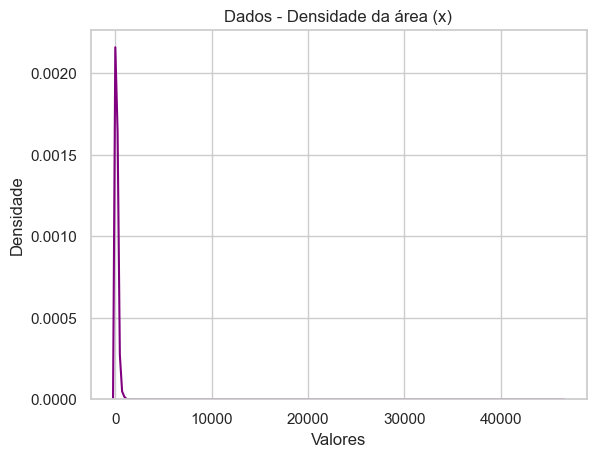

C:\Users\Pedro\AppData\Local\Temp\ipykernel_13700\56687408.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='purple', hist_kws={"edgecolor": 'black'})


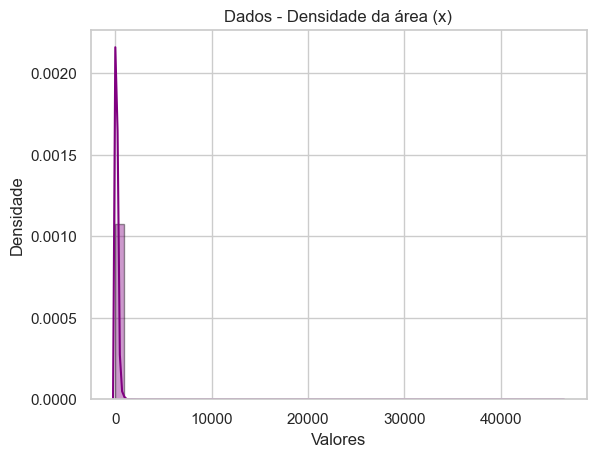

In [85]:
# 3- f) FAZER O GRÁFICO DE DENSIDADE JUNTO COM O HISTOGRAMA PARA A VARIÁVEL X

# grafico de densidade da área (x) sozinho
sns.distplot(x, hist = False, color='purple')
plt.title('Dados - Densidade da área (x)') 
plt.ylabel('Densidade') # densidade da área
plt.xlabel('Valores') # valores da tabela - tamanho da area de uma casa
plt.show()

# grafico de densidade junto o histograma da área (x)
sns.distplot(x, color='purple', hist_kws={"edgecolor": 'black'})
plt.title('Dados - Densidade da área (x)') 
plt.ylabel('Densidade') # densidade da área
plt.xlabel('Valores') # valores da tabela - tamanho da area de uma casa
plt.show()

C:\Users\Pedro\AppData\Local\Temp\ipykernel_13700\3112281789.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist = False, color='purple')


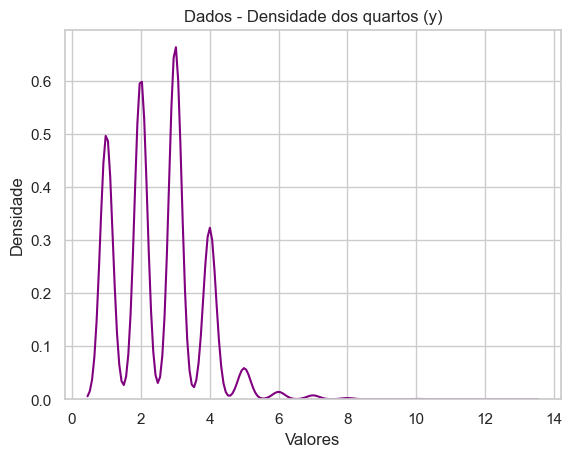

C:\Users\Pedro\AppData\Local\Temp\ipykernel_13700\3112281789.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='purple', hist_kws={"edgecolor": 'black'})


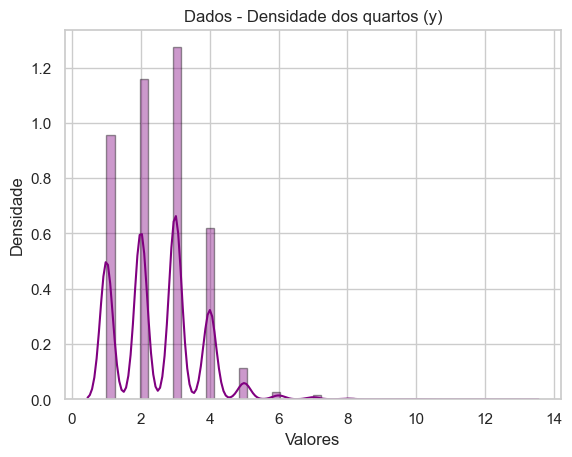

In [86]:
# 3- f) FAZER O GRÁFICO DE DENSIDADE JUNTO COM O HISTOGRAMA PARA A VARIÁVEL Y

# grafico de densidade dos quartos (y) sozinho
sns.distplot(y, hist = False, color='purple')
plt.title('Dados - Densidade dos quartos (y)') 
plt.ylabel('Densidade') # densidade dos quartos
plt.xlabel('Valores') # valores da tabela - quantidade de quartos
plt.show()

# grafico de densidade junto o histograma dos quartos (y)
sns.distplot(y, color='purple', hist_kws={"edgecolor": 'black'})
plt.title('Dados - Densidade dos quartos (y)')
plt.ylabel('Densidade') # densidade dos quartos
plt.xlabel('Valores') # valores da tabela - quantidade dos quartos
plt.show()